# تبدیل‌های خطی بر روی شکل‌ها
در این نوت‌بوک مشاهده می‌کنیم که تبدیل‌های خطی که با آنها آشنا شدیم بر روی یک شکل ساده که با وصل کردن نقاط به هم می‌سازیم چه تاثیری می‌گذارند.

## مقدمه
ما قبلاً یاد گرفتیم که یک تبدیل خطی می‌تواند یک بردار را بچرخاند، بکشاند یا بازتاب کند. در اسلایدها دیده‌ایم که تحت یک تبدیل خطی، خط‌ها حفظ می‌شوند، مبدأ ثابت می‌ماند و تناسب حفظ می‌شود.

حال با تعریف تعدادی نقطه و وصل کردن آنها به هم یک شکل ایجاد می‌کنیم و سپس با اعمال تبدیل خطی روی هر نقطه، شکل را تبدیل می‌کنیم.

## رسم خانه با نقاط
می‌توانید این خانه را با هر شکلی که می‌خواهید جایگزین کنید.

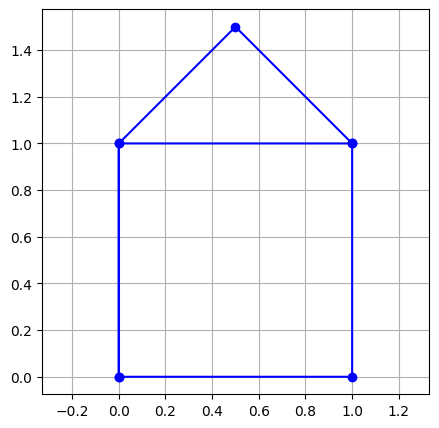

In [12]:
import numpy as np
import matplotlib.pyplot as plt

house = np.array([
    [0, 0],
    [0, 1],
    [1, 1],
    [1, 0],
    [0, 0],
    [0, 1],
    [0.5, 1.5],
    [1, 1]
])

def draw_shape(points, color='blue'):
    plt.figure(figsize=(5, 5))
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

draw_shape(house)


In [14]:
def apply_matrix(points, matrix):
    return points @ matrix.T


## چرخش و مقیاس‌دهی
کد زیر اسلایدرهایی ایجاد می‌کند تا پارامترهایی مثل زاویه چزخش را بتوان تغییر داد و تاثیر آن را دید. با تولید ماتریس‌های تبدیل با استفاده از پارامترها، این کد را کامل کنید و نتیجه را مشاهده کنید.

In [15]:
import ipywidgets as widgets
from IPython.display import display

theta_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=0, description='زاویه چرخش (°)')
scale_x_slider = widgets.FloatSlider(min=0.1, max=3, step=0.1, value=1, description='مقیاس X')
scale_y_slider = widgets.FloatSlider(min=0.1, max=3, step=0.1, value=1, description='مقیاس Y')

def update(theta, scale_x, scale_y):
    theta_rad = np.radians(theta)
    matrix = # TODO: Define the transformation matrix.
    transformed = apply_matrix(house, matrix)
    draw_shape(house, color='gray')
    draw_shape(transformed, color='red')

ui = widgets.VBox([theta_slider, scale_x_slider, scale_y_slider])
out = widgets.interactive_output(update, {
    'theta': theta_slider,
    'scale_x': scale_x_slider,
    'scale_y': scale_y_slider
})

display(ui, out)


Output()

## بازتاب نسبت به محور x و y

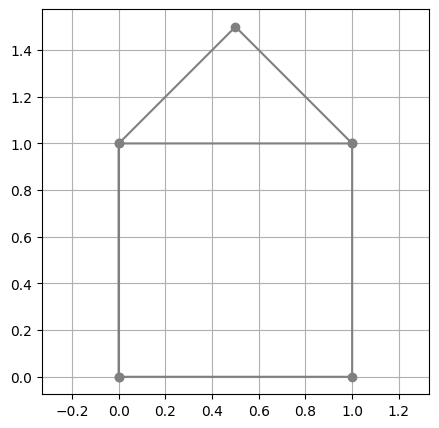

In [8]:
reflection_x = # TODO: Define the transformation matrix for reflection long the X-axis
reflection_y = # TODO: Define the transformation matrix for reflection long the Y-axis

house_reflect_x = apply_matrix(house, reflection_x)
house_reflect_y = apply_matrix(house, reflection_y)

draw_shape(house, color='gray')
draw_shape(house_reflect_x, color='green')

draw_shape(house, color='gray')
draw_shape(house_reflect_y, color='purple')


## برش (Shearing)

In [9]:
def apply_shear(shape, shx, shy):
    shear_matrix = # TODO: Define the transformation matrix for the shearing transformation
    return apply_matrix(shape, shear_matrix)

def plot_sheared(shx, shy):
    sheared = apply_shear(house, shx, shy)
    draw_shape(house, color='gray')
    draw_shape(sheared, color='blue')


widgets.interact(plot_sheared,
                 shx=widgets.FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='shx'),
                 shy=widgets.FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='shy'));



interactive(children=(FloatSlider(value=0.0, description='shx', max=2.0, min=-2.0), FloatSlider(value=0.0, des…

## انعکاس نسبت به خط Θ

In [17]:

def apply_mirror(shape, theta):
    # Mirror across a line through origin at angle theta
    mirror_matrix = # TODO: Define the transformation matrix
    return apply_matrix(shape, mirror_matrix)

def plot_mirrored(theta_deg):
    theta = np.radians(theta_deg)
    mirrored = apply_mirror(house, theta)
    draw_shape(house, color='gray')
    draw_shape(mirrored, color='blue')

widgets.interact(plot_mirrored,
                 theta_deg=widgets.FloatSlider(min=0, max=180, step=1, value=45, description='θ (deg)'));


interactive(children=(FloatSlider(value=45.0, description='θ (deg)', max=180.0, step=1.0), Output()), _dom_cla…

## تبدیل دلخواه
خودتان یک ماتریس تبدیل بسازید و ببینید چه تغییری در شکل ایجاد می‌شود.

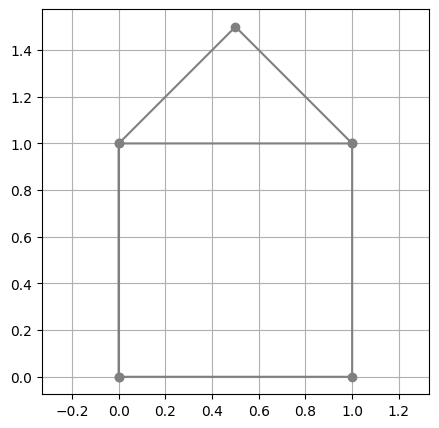

In [16]:
custom_matrix = np.array([
    [1, 0.5],
    [0.3, 1]
])

house_custom = apply_matrix(house, custom_matrix)
draw_shape(house, color='gray')
draw_shape(house_custom, color='crimson')
